# Python for Data Science
## Session 9
### Other data type


---

## Outline


1. Image manipulation (PIL, OpenCV)  

2. Basic use of algorithms (Scikit-image, Kornia)  
    
   

##  Other data type
### Image manipulation

One of the most important fields within **Artificial Intelligence** is **Computer Vision**. Until very recently, most impactful publications were made in this field. 
Although the foundations of **Deep Learning** were made many decades ago (80s-90s), the big achievements made in Computer Vision back in 2012 catalyzed a wave of research and industry adoption of deep learning. 

In this new wave many fields ignificantly benefited from it, Audio and Speech Recognition, Natural Language Processing, Healthcare and Medicine, Robotics, Cybersecurity, Earth Observation, Agriculture and many others.  

## Other data type
### Image manipulation

An image is usually represented as a 2D (grayscale) or 3D (RGB) matrix. Each of the RGB dimensions, red, green and blue are known as bands or channels. In some fields, like Earth Observation, we can work with images with multiple bands (up to thousands in some cases, known as hyperspectral images).

<img align="center" width="200px" src="session_9_files/rgb.png">

Note: Depending on the library rows and columns may be switched. 

## Other data type
### Image manipulation

In this session, we will work with images. Many applications make use of cameras in surveillance, medicine, advanced driving assistance, Earth observation, etc.

As in many other fields, Python offers very powerful libraries to manipulate and visualize images. Among them, **Pillow** and **OpenCV** ar two of the most popular ones. 

## Other data type
### Image manipulation

Images most of the times come in **uint8** or **uint16**, although there are some exceptions. In the first case, the range values are integers from 0 to 255, in the second case, from 0 to 65535. So depending on the application, we may see them in one or the other, although uint8, aka **byte**, is the most current one.

Let's start with Pillow!

65536


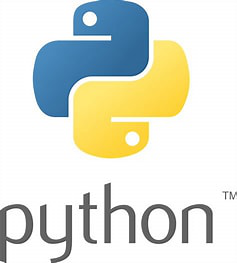

In [2]:
# to install it in your environment: python -m pip install Pillow

print(2**16)

# to make use of Pillow, we will use its Image module
from PIL import Image 

# Notebook will directly open the image without the need of using Matplotlib
img = Image.open('session_9_files/python_logo.jpeg') 
img

In [3]:
'''
The Image object offers the following methods to get some info:
    - format
    - size
    - mode
'''

print(f"format: {img.format}\nsize: {img.size} \nmode: {img.mode}")

# Note: It's important to mention that Pillow does not decode or load the raster 
# data unless it really has to. Hence, methods like format, size or mode won't load
# the whole image into memory.

format: JPEG
size: (237, 263) 
mode: RGB


In [4]:
'''
Additionally, Pillow offers through the Image class other methods
'''

# THUMBNAIL
size = (32, 32)
img.thumbnail(size)

# SAVE
outfile = 'python_logo_small.thumbnail'
 # Since thumbnail is not an standard extension, we specify the format
img.save(outfile, format="JPEG")

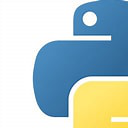

In [5]:
'''
Crop method -> (0, 0, 4, 4)
    
Original:

|  1  2  3  4  5  6 |
|  7  8  9 10 11 12 |
| 13 14 15 16 17 18 |
| 19 20 21 22 23 24 |
| 25 26 27 28 29 30 |
| 31 32 33 34 35 36 |

Cropped:

|  1  2  3  4 |
|  7  8  9 10 |
| 13 14 15 16 |
| 19 20 21 22 | 
'''

# CROP
img = Image.open('session_9_files/python_logo.jpeg')

box = (0, 0, 128, 128) # Images (0,0) coordinates are the top left 
cropped = img.crop(box)
cropped # this is again an Image class object

In [6]:
'''
Transpose method comes with different options:

Image.Transpose.ROTATE_90
Image.Transpose.ROTATE_180
Image.Transpose.ROTATE_270
Image.Transpose.FLIP_LEFT_RIGHT
Image.Transpose.FLIP_TOP_BOTTOM
...

'''

# TRANSPOSE
transpose = cropped.transpose(Image.Transpose.ROTATE_180) # 90, 180, 270

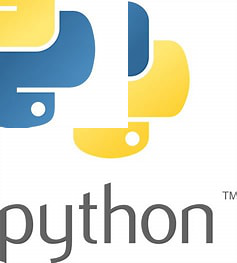

In [7]:
'''
Paste and copy methods

by providing a box, same as we do with crop, we can paste anything 
we want into the image object

'''

# COPY
# it will simply create a copy, in case we want to keep the original,
# since the method paste is performed inplace
img_copy = img.copy() 
img

# PASTE
img.paste(transpose, box) 
img

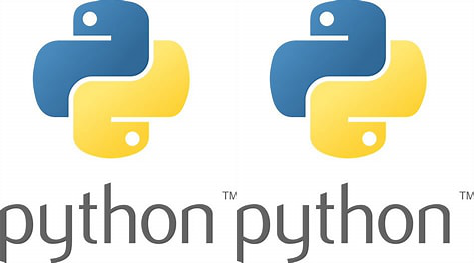

In [8]:
'''
Paste and new methods

We will create an empty RGB image and paste two images into it

'''
# let's create a new image that will contain both next to each other
img_1 = Image.open('session_9_files/python_logo.jpeg')
img_2 = Image.open('session_9_files/python_logo.jpeg')

w = img_1.size[0] + img_2.size[0] # width together
h = max(img_1.size[1], img_2.size[1]) # maximum height

# what happens if we go beyond the size?
# w *= 2/3
# w = int(w)

img = Image.new("RGB", (w, h))

img.paste(img_1)
img.paste(img_2, (img_1.size[0], 0))

img

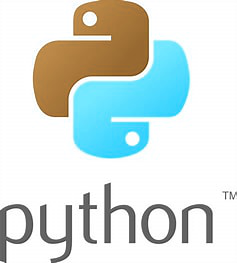

In [9]:
'''
Split and merge methods

These two methods will permit us to separate and stack bands
'''
img = Image.open('session_9_files/python_logo.jpeg')
r, g, b = img.split()
img = Image.merge("RGB", (b, g, r)) # we switch red with blue
img

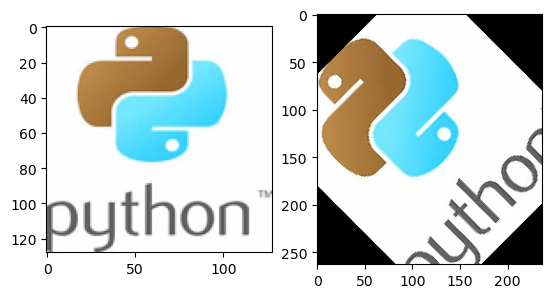

In [10]:
'''

Resize and rotate

These two methods will permit us to separate and stack bands

We will also use imshow from Matplotlib

'''
import matplotlib.pyplot as plt

out_1 = img.resize((128, 128))
# degrees counter-clockwise
out_2 = img.rotate(45) # missing values are set to 0s

plt.subplot(121)
plt.imshow(out_1)
#plt.axis('off')
plt.subplot(122)
plt.imshow(out_2)
#plt.axis('off')
plt.show()

Original size: (237, 263)


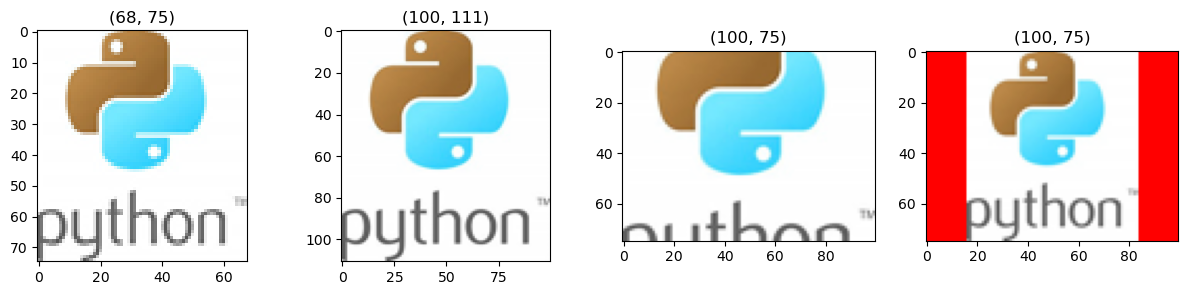

In [11]:
'''
Other methods can be pretty useful such as:
    - contain
    - cover
    - fit
    - pad
'''

from PIL import ImageOps

print(f"Original size: {img.size}")

size = (100, 75)

img_1 = ImageOps.contain(img, size)
img_2 = ImageOps.cover(img, size)
img_3 = ImageOps.fit(img, size)
img_4 = ImageOps.pad(img, size, color="#f00")

plt.figure(figsize=(15,3))
plt.subplot(141)
plt.title(img_1.size)
#plt.axis([0, img.size[0], 0, img.size[1]])
plt.imshow(img_1)
plt.subplot(142)
plt.title(img_2.size)
plt.imshow(img_2)
plt.subplot(143)
plt.title(img_3.size)
plt.imshow(img_3)
plt.subplot(144)
plt.title(img_4.size)
plt.imshow(img_4)
plt.show()

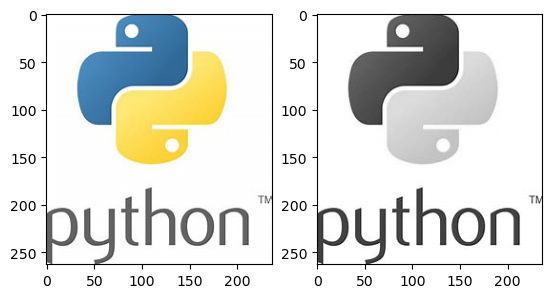

In [12]:
'''
Convert method: color conversion 
'''
img = Image.open('session_9_files/python_logo.jpeg')
converted = img.convert("L") # to gray scale, not an inplace method
#print(converted.mode)
# It converts colors into 216 colors optimized for web display
#converted = img.convert("P",palette=Image.Palette.WEB) 

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(converted, cmap='gray')
plt.show()

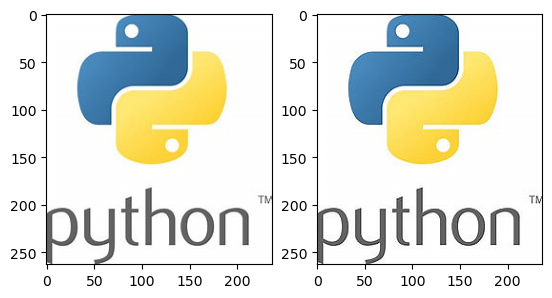

In [13]:
'''

filter method and ImageEnhance module: to enhance the images

'''

from PIL import ImageEnhance
from PIL import ImageFilter

# it sharpens the edges and removes some noise
filtered = img.filter(ImageFilter.DETAIL)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(filtered)
plt.show()

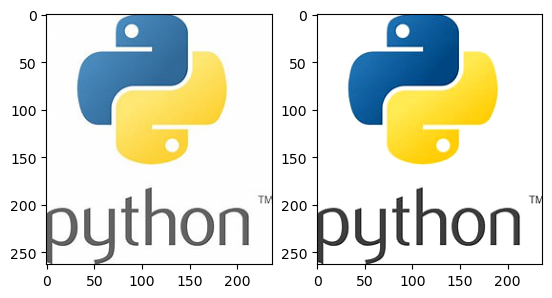

In [14]:
enh = ImageEnhance.Contrast(img)
enhanced = enh.enhance(1.3)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(enhanced) # here 
plt.show()

# we can also call show() from Pillow, but note that it will open a new window
# outside your notebook
# enh.enhance(1.3).show("30% more contrast") 

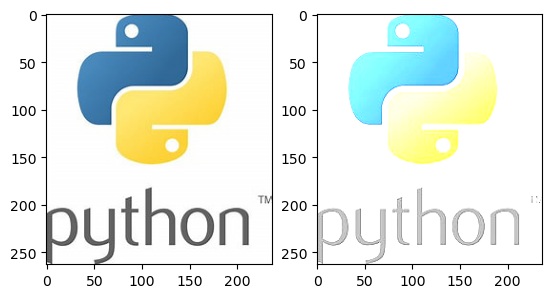

In [15]:
'''
Point method: modify the image at the pixel level
'''

from PIL import ImageFilter

# we multiply by 2 each pixel 
modified = img.point(lambda x: x * 2) # or / 2 to make it darker

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(modified) # we saturate the image
plt.show()

## Other data type
### Image manipulation

One of the most extended libraries that have been used in many real-time applications is **OpenCV**. This library not just offers support for **Python** but also for **C++**. 

In [17]:
'''
Let's start with opening an image
'''

# to install it: !python -m pip install opencv-python

import cv2 as cv # typical import, although some people use cv2

cv.imread('session_9_files/esade.jpeg') # it returns a numpy array, and we know how to work with them!

ModuleNotFoundError: No module named 'cv2'

In [18]:
'''
Since we know how to work with numpy, any single operation we
know should work in these 2D and 3D matrices
'''

img = cv.imread('session_9_files/python_logo.jpeg') # it returns a numpy array, and we know how to work with them!

plt.imshow(img) # What's going on with the color? 
plt.show()

# Note: OpenCV returns BRG, instead of RGB

NameError: name 'cv' is not defined

In [19]:
'''
cvcolor method: to change color space
'''

# changing to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# we can do the same to get back to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(rgb)
plt.title('RGB')
plt.axis('off')
plt.subplot(122)
plt.title('HSV')
plt.axis('off')
plt.imshow(hsv) 
plt.show()

NameError: name 'cv' is not defined

In [20]:
'''

Resize method: scale your image

'''

scaled_by_size = cv.resize(img, (150, 300), interpolation = cv.INTER_CUBIC)
scaled_by_factor = cv.resize(img, None, fx=2, fy=2, interpolation = cv.INTER_NEAREST)

plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(img)
plt.title('Original')
plt.subplot(132)
plt.title('Scaled by size')
plt.imshow(scaled_by_size) 
plt.subplot(133)
plt.title('Scaled by factor')
plt.imshow(scaled_by_factor)
plt.show()

NameError: name 'cv' is not defined

In [ ]:
'''
warpAffine method: to perform translations, rotations and reflections.

As a proper geometry transformation, we need to define the transformation matrix
'''
import numpy as np

img = cv.imread('session_9_files/esade.jpeg')
img = img[:,:,[2,1,0]] # From BGR to RGB
rows, cols, _ = img.shape # shape method from numpy
 
'''
Transformation T and point P:

T = | 1  0  4 |
    | 0  1  5 |
    | 0  0  1 |

P = | 2 |
    | 3 |
    | 1 |
    
New point:
    
P' = T * P =
    | 1  0  4 |   | 2 |   | 2 + 4 |   | 6 |
    | 0  1  5 | * | 3 | = | 3 + 5 | = | 8 |
    | 0  0  1 |   | 1 |   |   1   |   | 1 |

'''
    
M = np.float32([[1,0,100],[0,1,50]])
# rotating 45 degrees 
#M = np.float32([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],[np.sin(np.pi/4), np.cos(np.pi/4),0]])
print(M)
translated = cv.warpAffine(img, M, (cols,rows))
 
    
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.title('Translated')
plt.axis('off')
plt.imshow(translated) 
plt.show()

In [ ]:
'''

getAffineTransform method: To get the affine transformation between points into 
different places and transform the image, pretty useful in multiple applications

'''

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
transformed = cv.warpAffine(img, M, (cols,rows))
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.plot([50, 200, 50], [50, 50, 200], '*r', markersize=10)
plt.subplot(122)
plt.imshow(transformed)
plt.plot([10, 200, 100], [100, 50, 250], '*g', markersize=10)
plt.title('Transformed')
plt.show()


In [ ]:
'''

threshold method: We can also apply thresholds to images

cv.THRESH_{different types}: THRESH_BINARY_INV, THRESH_TRUNC,
THRESH_TOZERO, THRESH_TOZERO_INV

These methods are in some cases used for pre-processing images

'''

img = cv.imread('session_9_files/esade.jpeg', cv.IMREAD_GRAYSCALE) # we load the grayscale version

_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

manual = np.where(img >= 127, 255, 0)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')
plt.subplot(133)
plt.imshow(manual, cmap='gray')
plt.title('Manual')

plt.show()

In [ ]:
'''

There are other threshold methods such as Adaptive Thresholding or OTSU's.

'''

img = cv.imread('session_9_files/esade.jpeg', cv.IMREAD_GRAYSCALE)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

adapt2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
adapt3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.yticks([]), plt.xticks([])
plt.subplot(222)
plt.title('Binary th')
plt.imshow(th1, cmap='gray')
plt.yticks([]), plt.xticks([])
plt.subplot(223)
plt.title('Adaptative Mean')
plt.imshow(adapt2, cmap='gray')
plt.yticks([]), plt.xticks([])
plt.subplot(224)
plt.title('Adaptative Gaussian')
plt.imshow(adapt3, cmap='gray')
plt.yticks([]), plt.xticks([])
plt.show()

In [ ]:
'''
Otsu finds out of the binomial distribution the best threshold to split the values
'''

th, otsu = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.title('Otsu')
plt.imshow(otsu, cmap='gray')
plt.yticks([]), plt.xticks([])
plt.show()

In [ ]:
'''

filter2D, Blur, GaussianBlur, bilateralFilter methods: to filter images

'''

img = cv.imread('session_9_files/lena.jpg')[...,[2,1,0]]

# we create the filter
kernel = np.ones((5,5),np.float32)/25 # A 5x5 filter 
# this filter averages all pixel values

# filter image
filtered = cv.filter2D(img,-1,kernel)
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(filtered)
plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

# History of Lena: https://the.me/the-story-of-lena/

In [ ]:
# Blur images, it's the same as averaging
blurred = cv.blur(img,(5,5)) # try a bigger filter
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(blurred)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Gaussian blur images
blurred = cv.GaussianBlur(img,(5,5),0) # try a bigger filter
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(blurred)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Median blur images
blurred = cv.medianBlur(img, 5) # try a bigger filter
 
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(blurred)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Bilateral filter blur images
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns

# adding noise
np.random.seed(1234)

std = 20
mean = 0 
gaussian_noise = np.random.randn(*img.shape) * std + mean

noisy = img.copy() + gaussian_noise
noisy = np.clip(noisy, 0, 255).astype('uint8')

# sns.histplot(noise.flatten()) # to visualize the random values 
# plt.show()

blurred = cv.bilateralFilter(img,9,75,75) # try a bigger filter
 
plt.subplot(121)
plt.imshow(noisy)
plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(blurred)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
dilate and erode methods: to transform the image morphologically

These methods are usually applied on binary images.

'''
img = cv.imread('session_9_files/j.png')

# same way we created a filter before, we use one now
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(erosion), plt.title('Eroded'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# the same using dilated
dilated = cv.dilate(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dilated), plt.title('Dilated'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
morphologyEx method: to apply other type of transformations

Another interesting one is gradient, that allow us to extract edges.
'''
kernel = np.ones((3,3))
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(gradient), plt.title('Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Laplacian, Sobel and Canny edge detector methods 
'''
img = cv.imread('session_9_files/esade.jpeg', cv.IMREAD_GRAYSCALE)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5) # in different direction, x
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5) # in different direction, y
edges = cv.Canny(img,100,200)

plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(2,2,1),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''

Another useful tool is the countours method: to find objects in binary images

'''

# read Esade logo image
img = cv.imread('session_9_files/esade_logo.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
grad = cv.Canny(gray,100,200)

# plt.imshow(grad, cmap='gray')
# plt.show()

contours, hierarchy = cv.findContours(grad, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
 
print("Number of Contours found = " + str(len(contours))) 

    
# area 
area = cv.contourArea(contours[2])
print(f"Contour area of index 2 is: {area}")

plt.figure(figsize=(12,12))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])

cv.drawContours(img, [contours[2]], -1, (255, 0, 255), 3)

plt.subplot(122)
plt.imshow(img), plt.title('Gradient'), plt.xticks([]), plt.yticks([])
plt.show()


## Other data type
### Image manipulation

Exercise: 
- Can you count the coins you have in *coins.jpg*?

## Other data type
## Basic use of algorithms 

Let's see what other big libraries like **scikit-image** and **kornia** can offer. In the case of scikit-image, we will look at some of the methods and their simplicity compared to OpenCV. Similar to opencv, our images are numpy arrays.

In [ ]:
# to install scikit-image: !python -m pip install scikit-image
'''
color, io and util modules: to manipulate an image
'''
import skimage as ski
import cv2 as cv
import matplotlib.pyplot as plt

img = ski.io.imread('session_9_files/lena.jpg') # read image
hsv = ski.color.rgb2hsv(img) # HSV
gray = ski.color.rgb2gray(img) # GRAY
inverted_img = ski.util.invert(img) # INVERT, negative effect

plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(hsv), plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(gray, cmap='gray'), plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(inverted_img), plt.title('Inverted'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Segmenting an image using Superpixels
'''

from skimage.segmentation import slic
from skimage.color import label2rgb

coins = ski.io.imread('session_9_files/coins.jpg') # we can also read images
coins = ski.color.rgb2gray(coins)

# Make segmentation using SLIC superpixels.
seg = slic(
    coins,
    n_segments=500,
    max_num_iter=500,
    sigma=1,
    compactness=0.75,
    channel_axis=None,
    start_label=0,
)

colored = label2rgb(seg, image=coins, image_alpha=0.5,)

plt.subplot(121), plt.imshow(coins), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(colored), plt.title('Superpixels'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Let's play with the exposure module to perform stretching and equalization
'''

# Load the moon image from Scikit-Image
img = ski.data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98)) # we optain the percentile values at 2 and 98
img_rescale = ski.exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization: making a picture clearer by spreading out the colors evenly
# this way, bright and dark areas are easier to visualize
img_eq = ski.exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = ski.exposure.equalize_adapthist(img, clip_limit=0.03)

plt.figure(figsize=(15,3))
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(img_rescale, cmap='gray'), plt.title('Streched'), plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(img_eq, cmap='gray'), plt.title('Equalized'), plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(img_adapteq, cmap='gray'), plt.title('Equalized Adaptive'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Another method within the morphology module is skeletonize
'''

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

img = ski.io.imread('session_9_files/elephant.jpg')
img = ski.color.rgb2gray(img)

# invert the image
image = invert(img) # float values [0, 1]
image = image > 0.1
image = cv.dilate(image.astype('uint8'), (15,15), iterations=15)

# perform skeletonization
skeleton = skeletonize(image)

plt.subplot(121), plt.imshow(image), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(skeleton), plt.title('Superpixels'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
'''
Template Matching can be performed with OpenCV and Scikit-learn.
Here, we will use scikit-learn for its simplicity
Scikit-image example!
'''

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
# over the matching result we get the one with highest response
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
plt.subplot(1, 3, 1), plt.imshow(coin, cmap='gray'), plt.title('Template')
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(image, cmap='gray'),  plt.title('Image')
plt.axis('off')
plt.subplot(1, 3, 3)
hcoin, wcoin = coin.shape
plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
plt.title('`match_template`\nresult')
plt.imshow(result)
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.axis('off')
plt.show()

In [ ]:
'''
Histogram matching method can be useful when transforming an image
into the same color histogram
'''

import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = ski.io.imread('session_9_files/avatar.jpg')
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Source')
plt.subplot(1,3,2)
plt.imshow(reference)
plt.title('Reference')
plt.subplot(1,3,3)
plt.imshow(matched)
plt.title('Matched')
plt.show()

## Other data type
### Basic use of algorithms 

One of the most trending open-source libraries in recent years is **Kornia**. Developed by Catalan researcher Edgar Riba, this library offers a wide range of features, making it a standout tool for modern computer vision applications. Among it features, we can find:

1. Geometric transformations
2. Image filtering
3. Feature detection and matching
4. Optical flow
5. Camera models and calibration

While there are other libraries offering similar features, Kornia distinguishes itself by being built on top of PyTorch. Like PyTorch, it is a user-friendly library that leverages GPUs for high efficiency. Moreover, thanks to the contributors behind the scenes, latest implementations are usually available in Kornia.

## Other data type
### Basic use of algorithms

We will use a face detector already available in Kornia, to detect faces and blur them.

Let's use Colab: https://kornia.github.io/tutorials/nbs/face_detection.html

## Other data type
### Exercise

For this session, we won't have any assignment! If there's any time left, let's use it to finish previous assignments, or work in the group project.